<a href="https://colab.research.google.com/github/vasicmateja/PictureSegmentation/blob/main/PictureSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools
!pip install matplotlib

In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path

from pycocotools.coco import COCO

from PIL import Image
import requests
from io import BytesIO
from scipy.ndimage import zoom
import numpy as np

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models

import matplotlib.pyplot as plt

In [ ]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
!unzip annotations_trainval2017.zip

--2023-12-13 08:46:29--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.117.25, 52.217.102.156, 52.217.114.137, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.117.25|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘annotations_trainval2017.zip’

annotations_trainva 100%[===================>] 241.19M  11.3MB/s    in 29s     

2023-12-13 08:46:58 (8.42 MB/s) - ‘annotations_trainval2017.zip’ saved [252907541/252907541]

Archive:  annotations_trainval2017.zip
  inflating: annotations/instances_train2017.json  
  inflating: annotations/instances_val2017.json  
  inflating: annotations/captions_train2017.json  
  inflating: annotations/captions_val2017.json  
  inflating: annotations/person_keypoints_train2017.json  
  inflating: annotations/person_keypoints_val2017.json  


In [ ]:
coco_annotation_file = 'annotations/instances_train2017.json'
coco = COCO(coco_annotation_file)

loading annotations into memory...
Done (t=17.17s)
creating index...
index created!


In [ ]:
coco.getCatIds(catNms=['donut','pizza','cake'])

[59, 60, 61]

In [ ]:
donutIds = coco.getImgIds(catIds = coco.getCatIds(catNms=['donut']))[:50]
pizzaIds = coco.getImgIds(catIds = coco.getCatIds(catNms=['pizza']))[:50]
cakeIds= coco.getImgIds(catIds = coco.getCatIds(catNms=['cake']))[:50]

In [ ]:
print(donutIds)
print(pizzaIds)
print(cakeIds)

[24577, 73733, 475142, 466960, 393243, 32801, 352295, 548906, 335922, 335928, 376891, 327746, 254032, 557137, 155735, 262239, 204897, 475236, 172135, 409706, 180333, 376946, 106614, 532603, 254081, 147586, 549002, 532624, 123028, 106646, 499866, 475295, 82083, 467109, 426152, 475313, 319669, 24763, 368827, 286910, 434370, 540868, 434372, 131276, 499922, 434409, 82157, 106736, 524535, 246009]
[106497, 270338, 253960, 548874, 344080, 581655, 188447, 270369, 204837, 90151, 516139, 294957, 442416, 507952, 532531, 483382, 335935, 155714, 393290, 32843, 213070, 409678, 41041, 311378, 581715, 532565, 172121, 532571, 155741, 327777, 221282, 516193, 524389, 426086, 516205, 110, 278638, 548976, 24689, 491636, 65655, 106617, 499837, 32893, 73855, 434305, 139394, 41097, 491659, 24716]
[245760, 253955, 253959, 311304, 540679, 434183, 401425, 139281, 442387, 65557, 188440, 360473, 270362, 90139, 229407, 393251, 262180, 573476, 417830, 286760, 507946, 327724, 507951, 548913, 581683, 204853, 262200, 4

In [ ]:
pictures = coco.loadImgs(donutIds + pizzaIds + cakeIds)

In [ ]:
pictures[0]

{'license': 5,
 'file_name': '000000024577.jpg',
 'coco_url': 'http://images.cocodataset.org/train2017/000000024577.jpg',
 'height': 593,
 'width': 600,
 'date_captured': '2013-11-20 14:13:23',
 'flickr_url': 'http://farm9.staticflickr.com/8559/8999312337_dd3168f44e_z.jpg',
 'id': 24577}

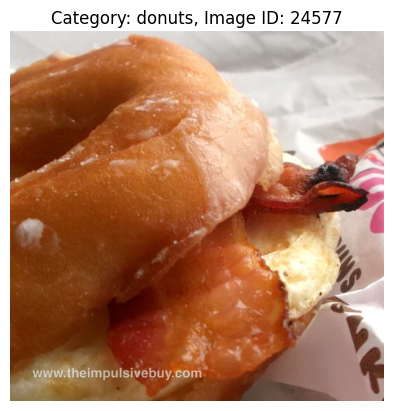

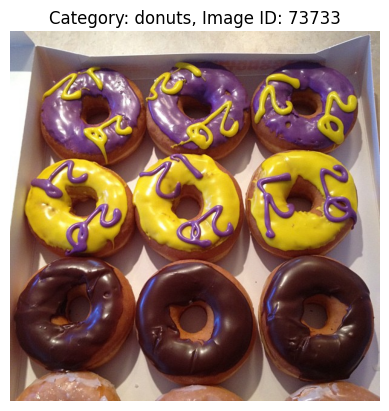

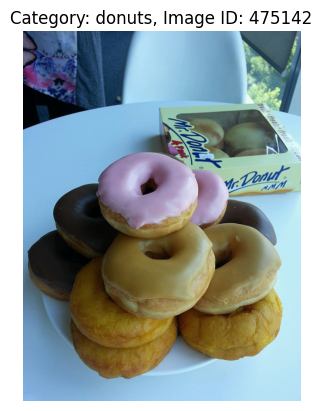

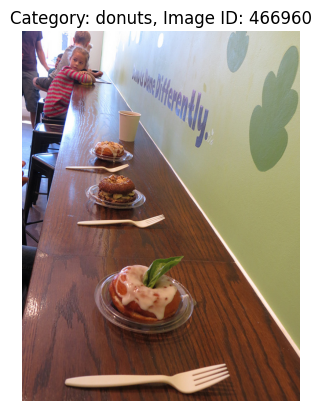

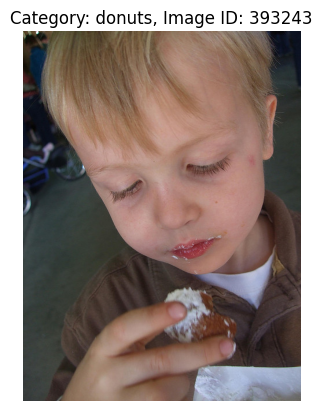

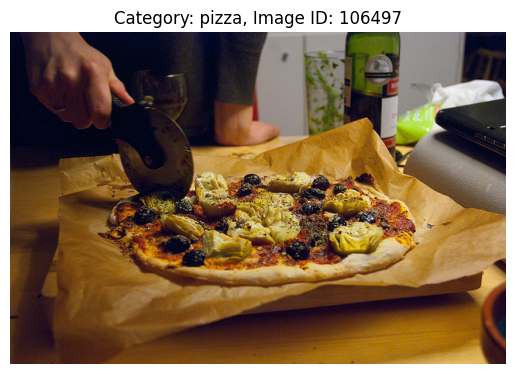

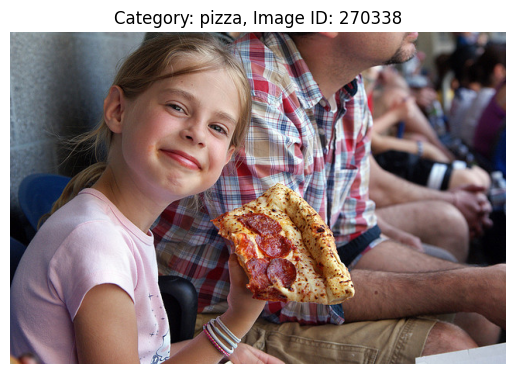

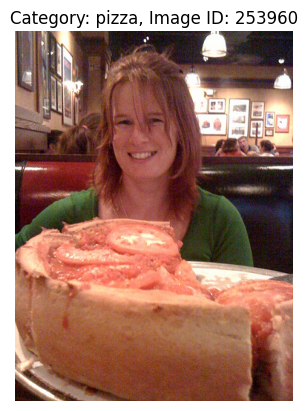

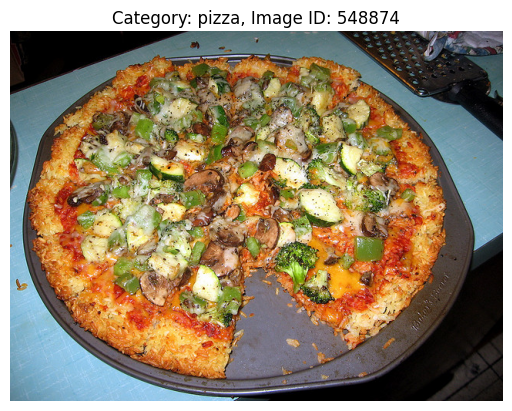

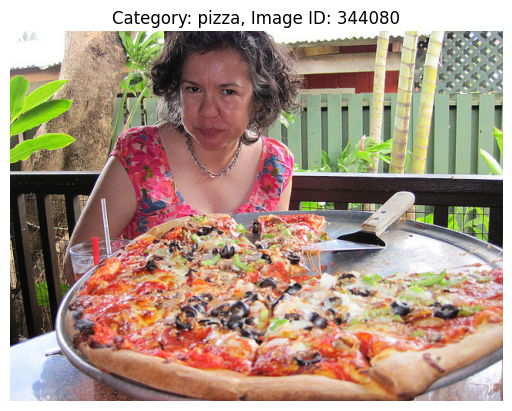

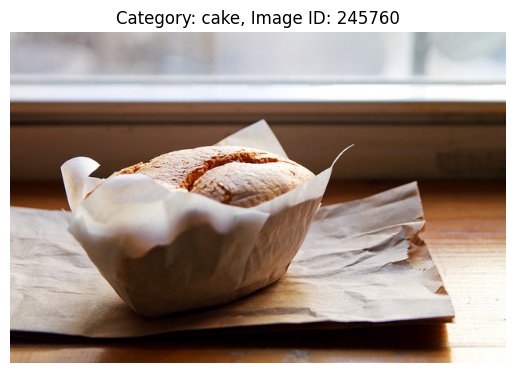

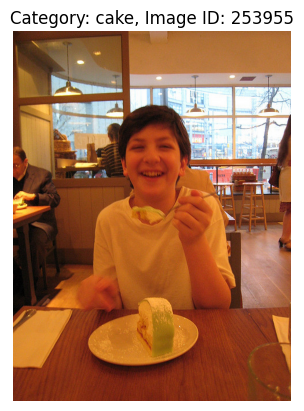

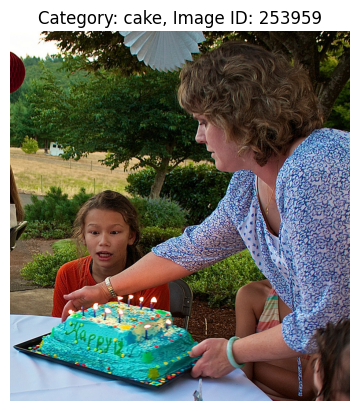

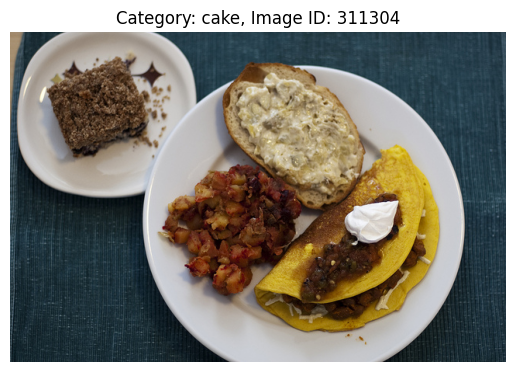

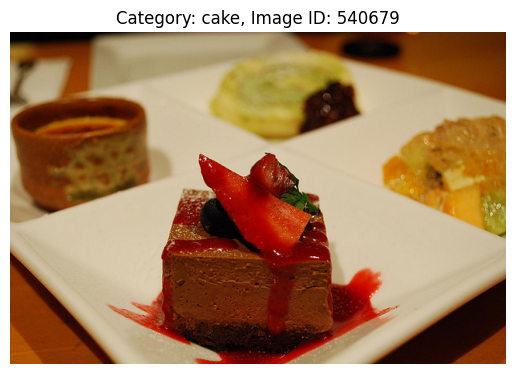

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

pictures = coco.loadImgs(donutIds + pizzaIds + cakeIds)

# Dictionary za praćenje broja isprintanih slika po kategoriji
count_per_category = {'donuts': 0, 'pizza': 0, 'cake': 0}

# Prikaz pet slika po kategoriji
for picture in pictures:
    if picture['id'] in donutIds:
        category = 'donuts'
    elif picture['id'] in pizzaIds:
        category = 'pizza'
    elif picture['id'] in cakeIds:
        category = 'cake'
    else:
        continue

    if count_per_category[category] >= 5:
        continue

    response = requests.get(picture['coco_url'])
    img = Image.open(BytesIO(response.content))

    plt.figure()
    plt.imshow(img)
    plt.title(f"Category: {category}, Image ID: {picture['id']}")
    plt.axis('off')
    plt.show()

    count_per_category[category] += 1


In [ ]:
coco.loadAnns(coco.getAnnIds(pictures[0]['id']))

[{'segmentation': [[1.33,
    67.96,
    57.3,
    39.98,
    90.62,
    46.64,
    163.91,
    22.65,
    202.55,
    10.66,
    250.53,
    10.66,
    266.52,
    17.32,
    291.84,
    33.31,
    310.49,
    50.64,
    323.82,
    63.96,
    337.14,
    69.29,
    347.8,
    81.29,
    357.13,
    94.61,
    369.13,
    102.61,
    379.79,
    107.94,
    403.77,
    122.6,
    410.44,
    138.59,
    414.43,
    147.92,
    415.77,
    150.58,
    417.1,
    155.91,
    415.77,
    169.24,
    417.1,
    177.23,
    417.1,
    198.56,
    415.77,
    214.55,
    399.78,
    239.87,
    379.79,
    283.84,
    353.13,
    298.5,
    334.48,
    317.16,
    307.83,
    343.81,
    281.18,
    365.13,
    253.19,
    385.12,
    221.21,
    407.77,
    194.56,
    425.09,
    165.24,
    434.42,
    141.25,
    446.42,
    127.93,
    457.08,
    105.27,
    477.07,
    99.94,
    481.06,
    95.95,
    487.73,
    46.64,
    525.04,
    26.65,
    535.7,
    2.67,
    547.69]],
  'ar

In [ ]:
annotations = [coco.loadAnns(coco.getAnnIds(picture['id'])) for picture in pictures]
segments = [[coco.annToMask(segment) * max(0, min(segment['category_id'] - 58, 3)) for segment in annotation] for annotation in annotations]
segm_reduce = [zoom(np.maximum.reduce(segment), (224/np.maximum.reduce(segment).shape[0], 224/np.maximum.reduce(segment).shape[1]), order=0, mode='nearest') for segment in segments]

In [ ]:
segm_reduce = to_categorical(np.asarray(segm_reduce)) #[[[1,0,0,0],[0,1,0,0]]]
segm_reduce.shape

(150, 224, 224, 4)

In [ ]:
picutres_in_matrix = []
for picture in pictures:
# Download the image from the URL
  response = requests.get(picture['coco_url'])
  img = Image.open(BytesIO(response.content))

  # Convert the image to a NumPy array
  img_array = np.array(img)

  scale_x = 224/img_array.shape[0]
  scale_y = 224/img_array.shape[1]

  img_array = zoom(img_array, (scale_x, scale_y, 1), order=0, mode='nearest')

  picutres_in_matrix.append(img_array)

picutres_in_matrix = np.asarray(picutres_in_matrix)

In [ ]:
picutres_in_matrix.shape

(150, 224, 224, 3)

In [ ]:
labels = segm_reduce
features = picutres_in_matrix

train_features = features[:120]
train_labels = labels[:120]
validation_features = features[120:]
validation_labels = labels[120:]

##Modeli

In [ ]:
base_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.UpSampling2D(2),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(4, (1, 1), padding='same', activation='softmax'),
    layers.UpSampling2D(2)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

29084464/29084464 [==============================] - 2s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 up_sampling2d (UpSampling2  (None, 14, 14, 1024)      0         
 D)                                                              
                                                                 
 conv2d (Conv2D)             (None, 14, 14, 128)       1179776   
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 28, 28, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        73792     
                                                         

In [ ]:
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model1 = models.Sequential([
    base_model,
    layers.UpSampling2D(2),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(2),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(4, (1, 1), padding='same', activation='softmax'),
    layers.UpSampling2D(2)
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()


9406464/9406464 [==============================] - 2s 0us/step
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 up_sampling2d_5 (UpSamplin  (None, 14, 14, 1280)      0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       1474688   
                                                                 
 up_sampling2d_6 (UpSamplin  (None, 28, 28, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 64)        73

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model2 = models.Sequential([
    base_model,
    layers.UpSampling2D(size=(2, 2)),
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(size=(2, 2)),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(size=(2, 2)),
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    layers.UpSampling2D(size=(2, 2)),
    layers.Conv2D(16, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(4, (1, 1), padding='same', activation='softmax'),
    layers.UpSampling2D(size=(2, 2))
])

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()


16705208/16705208 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional  (None, 7, 7, 1280)        4049571   
 )                                                               
                                                                 
 up_sampling2d_10 (UpSampli  (None, 14, 14, 1280)      0         
 ng2D)                                                           
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       1474688   
                                                                 
 up_sampling2d_11 (UpSampli  (None, 28, 28, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        

In [ ]:
def train_model(model, train_features, train_labels, val_dataset, batch_size=32, epochs=10):
    if not isinstance(train_features, tuple):
        train_dataset = (train_features, train_labels)
    else:
        train_dataset = (train_features[0], train_features[1])

    callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
        tf.keras.callbacks.ModelCheckpoint('model_checkpoint.h5', save_best_only=True)
    ]

    history = model.fit(
        x=train_dataset[0],
        y=train_dataset[1],
        batch_size=batch_size,
        epochs=epochs,
        validation_data=val_dataset,
        callbacks=callbacks
    )

    return history


##Treniranje


In [ ]:
history = train_model(model, train_features, train_labels, val_dataset = (validation_features, validation_labels), batch_size=16, epochs=100)

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.4781 - accuracy: 0.2832

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 29s 1s/step - loss: 1.4781 - accuracy: 0.2832 - val_loss: 1.3657 - val_accuracy: 0.5740
Epoch 2/100
8/8 [==============================] - 1s 103ms/step - loss: 1.2757 - accuracy: 0.4371 - val_loss: 1.6215 - val_accuracy: 0.5913
Epoch 3/100
8/8 [==============================] - 1s 203ms/step - loss: 1.1999 - accuracy: 0.5182 - val_loss: 1.1324 - val_accuracy: 0.6591
Epoch 4/100
8/8 [==============================] - 1s 93ms/step - loss: 1.1186 - accuracy: 0.5941 - val_loss: 1.3811 - val_accuracy: 0.6117
Epoch 5/100
8/8 [==============================] - 1s 93ms/step - loss: 1.0688 - accuracy: 0.6364 - val_loss: 1.1383 - val_accuracy: 0.6816
Epoch 6/100
8/8 [==============================] - 1s 198ms/step - loss: 0.9712 - accuracy: 0.6907 - val_loss: 1.0903 - val_accuracy: 0.6869
Epoch 7/100
8/8 [==============================] - 1s 200ms/step - loss: 0.9120 - accuracy: 0.7144 - val_loss: 0.9572 - val_accuracy: 0.7114
Epoch 8/100
8/8 [============

In [ ]:
history = train_model(model1, train_features, train_labels, val_dataset = (validation_features, validation_labels), batch_size=16, epochs=100)

Epoch 1/100
8/8 [==============================] - 10s 649ms/step - loss: 1.4167 - accuracy: 0.4166 - val_loss: 6.4179 - val_accuracy: 0.0968
Epoch 2/100
8/8 [==============================] - 1s 120ms/step - loss: 1.2251 - accuracy: 0.5423 - val_loss: 5.5422 - val_accuracy: 0.0401
Epoch 3/100
8/8 [==============================] - 1s 123ms/step - loss: 1.1620 - accuracy: 0.6034 - val_loss: 3.0715 - val_accuracy: 0.1739
Epoch 4/100
8/8 [==============================] - 2s 242ms/step - loss: 1.0972 - accuracy: 0.6413 - val_loss: 1.5445 - val_accuracy: 0.5269
Epoch 5/100
8/8 [==============================] - 1s 103ms/step - loss: 1.0204 - accuracy: 0.6740 - val_loss: 1.7435 - val_accuracy: 0.4145
Epoch 6/100
8/8 [==============================] - 2s 306ms/step - loss: 0.9525 - accuracy: 0.6971 - val_loss: 1.4350 - val_accuracy: 0.5132
Epoch 7/100
8/8 [==============================] - 3s 361ms/step - loss: 0.9200 - accuracy: 0.7151 - val_loss: 1.2553 - val_accuracy: 0.5906
Epoch 8/100


In [ ]:
history = train_model(model2, train_features, train_labels, val_dataset = (validation_features, validation_labels), batch_size=16, epochs=100)

Epoch 1/100
8/8 [==============================] - 18s 757ms/step - loss: 1.3676 - accuracy: 0.4746 - val_loss: 3.0760 - val_accuracy: 0.0435
Epoch 2/100
8/8 [==============================] - 2s 220ms/step - loss: 1.0040 - accuracy: 0.6597 - val_loss: 2.2566 - val_accuracy: 0.4144
Epoch 3/100
8/8 [==============================] - 2s 208ms/step - loss: 0.8896 - accuracy: 0.7225 - val_loss: 2.1113 - val_accuracy: 0.4529
Epoch 4/100
8/8 [==============================] - 1s 183ms/step - loss: 0.8159 - accuracy: 0.7524 - val_loss: 1.4056 - val_accuracy: 0.5859
Epoch 5/100
8/8 [==============================] - 1s 186ms/step - loss: 0.7019 - accuracy: 0.8057 - val_loss: 1.1860 - val_accuracy: 0.6888
Epoch 6/100
8/8 [==============================] - 1s 190ms/step - loss: 0.6127 - accuracy: 0.8467 - val_loss: 1.1777 - val_accuracy: 0.6897
Epoch 7/100
8/8 [==============================] - 1s 186ms/step - loss: 0.5468 - accuracy: 0.8687 - val_loss: 1.0682 - val_accuracy: 0.7017
Epoch 8/100


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def print_prediction(model, image, mask):
    image = np.expand_dims(image, axis=0)
    mask = np.expand_dims(mask, axis=0)

    predicted_mask = model.predict(image)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    plt.imshow(image[0])
    plt.title('Original Image')

    plt.subplot(1, 3, 2)
    plt.imshow(mask[0, :, :, 0], cmap='gray')
    plt.title('Ground Truth Mask')

    plt.subplot(1, 3, 3)
    plt.imshow(np.argmax(predicted_mask[0], axis=2).astype(int))
    #plt.imshow(predicted_mask[0, :, :, 0], cmap='gray')
    plt.title('Predicted Mask')

    plt.show()





1/1 [==============================] - 3s 3s/step


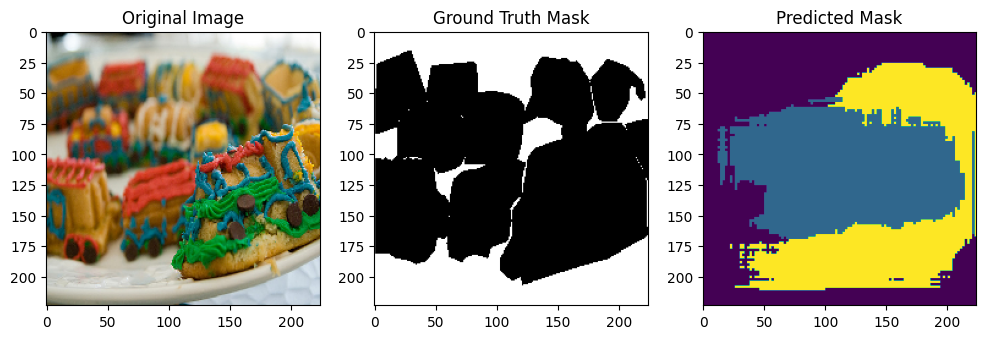

In [ ]:
print_prediction(model,validation_features[10],validation_labels[10])

1/1 [==============================] - 1s 1s/step


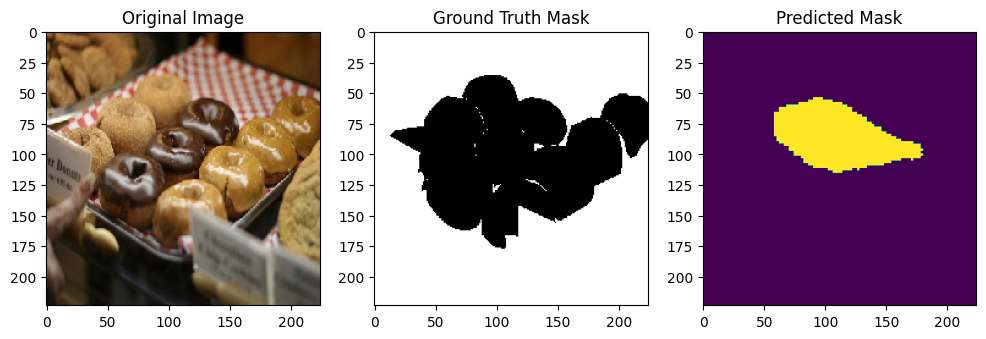

In [ ]:
print_prediction(model1,train_features[33],train_labels[33])

1/1 [==============================] - 2s 2s/step


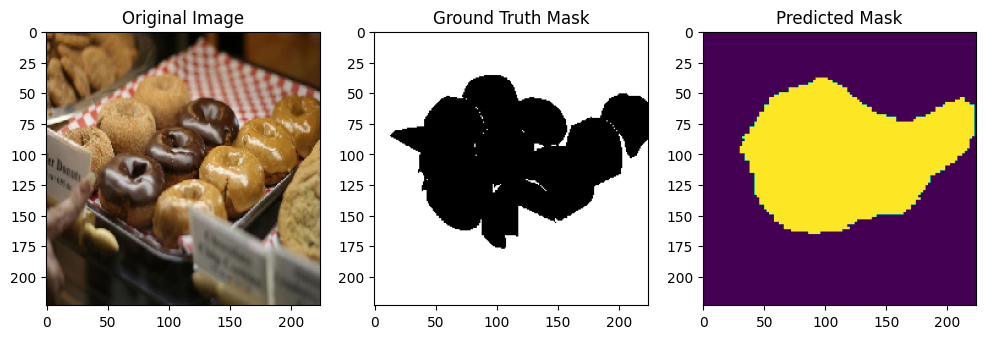

In [ ]:
print_prediction(model2,train_features[33],train_labels[33])